In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import linalg as la
import seaborn as sns

[[-0.2744103  -0.07471681 -0.36630055 ... -0.89931694 -0.18526272
   0.16852951]
 [-1.24176016  3.01970454  0.28031825 ... -1.47415007 -0.78780983
  -0.32434285]
 [-1.79058076  2.87027091 -0.45228284 ... -3.27278395 -1.15833526
   0.01271618]]
Eigenvalues:
 [ 2.61059713e+01+0.j -2.84341542e-16+0.j  2.07672076e+00+0.j] 

Eigenvectors:
 [[-0.11273212 -0.81649658  0.56623741]
 [-0.58076424 -0.40824829 -0.70430549]
 [-0.80622848  0.40824829  0.42816932]] 

Spectrum:
 [2.61059713e+01 2.07672076e+00 3.46365468e-16] 

U:
 [[-0.11273212  0.56623741 -0.81649658]
 [-0.58076424 -0.70430549 -0.40824829]
 [-0.80622848  0.42816932  0.40824829]] 

V^T:
 [[-0.11273212 -0.58076424 -0.80622848]
 [ 0.56623741 -0.70430549  0.42816932]
 [-0.81649658 -0.40824829  0.40824829]] 



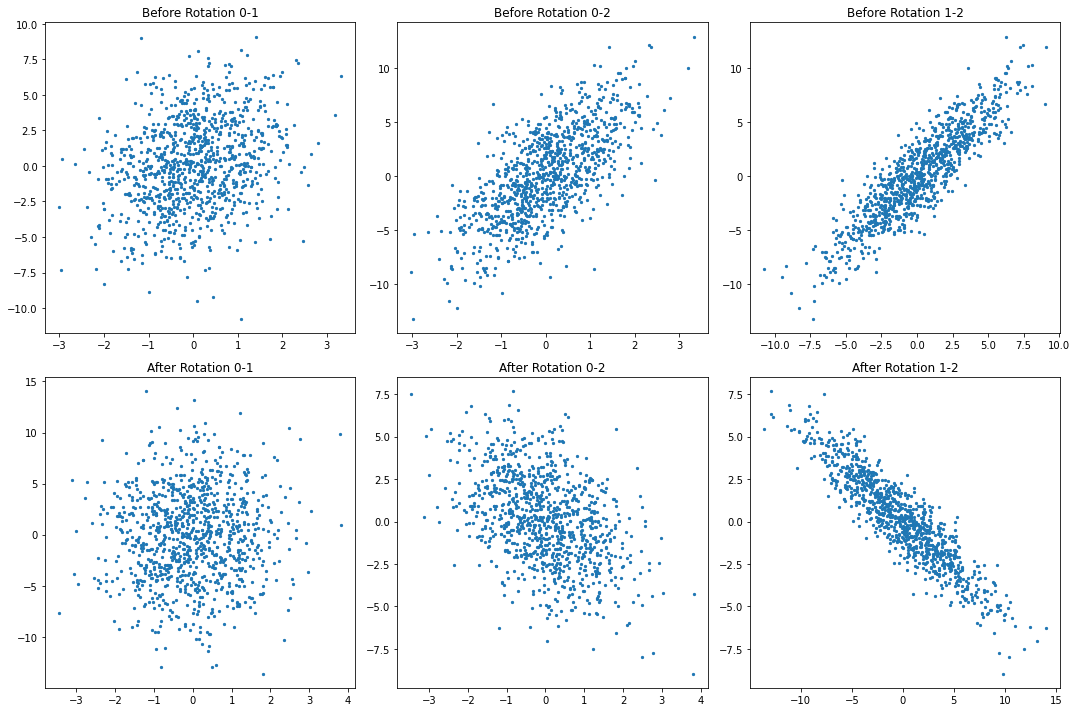

In [17]:
#EX1

N = 1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2

x = np.array([x1, x2, x3])
print(x)

np_cov = np.cov(x)

l, V = la.eig(np_cov)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

U, s, Vt = la.svd(np_cov)

print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

xp = np.dot(V, x)
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

[[ax01, ax02, ax12],[ax_01, ax_02, ax_12]] = axes


ax01.scatter(x[0], x[1], s = 5)
ax01.set_title('Before Rotation 0-1')
ax02.scatter(x[0], x[2], s = 5)
ax02.set_title('Before Rotation 0-2')
ax12.scatter(x[1], x[2], s = 5)
ax12.set_title('Before Rotation 1-2')
ax_01.scatter(xp[0], xp[1], s = 5)
ax_01.set_title('After Rotation 0-1')
ax_02.scatter(xp[0], xp[2], s = 5)
ax_02.set_title('After Rotation 0-2')
ax_12.scatter(xp[1], xp[2], s = 5)
ax_12.set_title('After Rotation 1-2')

plt.tight_layout()
plt.show()

Covariance matrix:
 [[ 1.00286466  0.88013009  2.87508291]
 [ 0.88013009  9.84416096 11.60412131]
 [ 2.87508291 11.60412131 17.35659412]] 

Eigenvalues:
 [2.61195465e+01 4.02469921e-03 2.08004856e+00] 

Eigenvectors:
 [[-0.1126355  -0.81595106  0.56704242]
 [-0.58087391 -0.40893137 -0.70381861]
 [-0.80616298  0.40865511  0.4279045 ]] 


With SVD:
Eigenvalues:
 [2.61552959e+01 2.08116568e+00 4.02541932e-03]
Eigenvectors:
 [[-0.11249155  0.56706085 -0.81595812]
 [-0.58106129 -0.70367158 -0.40891819]
 [-0.80604803  0.42812183  0.40865421]]


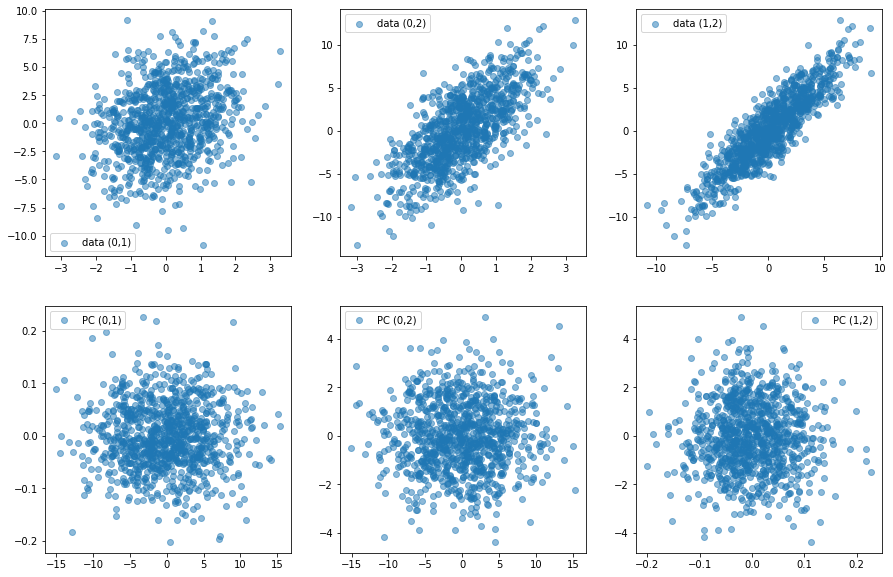

In [18]:
#EX2

noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = x + np.sum(noises, axis = 2)


cov1 = np.cov(x_noise)
print("Covariance matrix:\n", cov1, '\n')
l1, V1 = la.eig(cov1)
l1 = np.real_if_close(l1)

U1, s1, Vt1 = la.svd(x_noise)
l_svd1 = s1**2 / (N-1)
V_svd1 = U1

print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')
print('\nWith SVD:\nEigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)

Xp1 = np.dot(V1.T, x_noise)
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

axs[0,0].scatter(x_noise[0,:], x_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(x_noise[0,:], x_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(x_noise[1,:], x_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(Xp1[0,:], Xp1[1,:], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(Xp1[0,:], Xp1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(Xp1[1,:], Xp1[2,:], alpha=0.5, label='PC (1,2)')
axs[1,2].legend()

plt.show()